In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
app = pd.read_csv('../input/application_train.csv')

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

<font size=3>Features with high missing rate are all related to housing information</font>

In [5]:
nan_ratio = (app.isnull().sum() / len(app)).sort_values(ascending=False)
nan_ratio[:60]

COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
COMMONAREA_MEDI                 0.698723
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_AV

<font size=5>Do some simple visualisation on category columns</font>

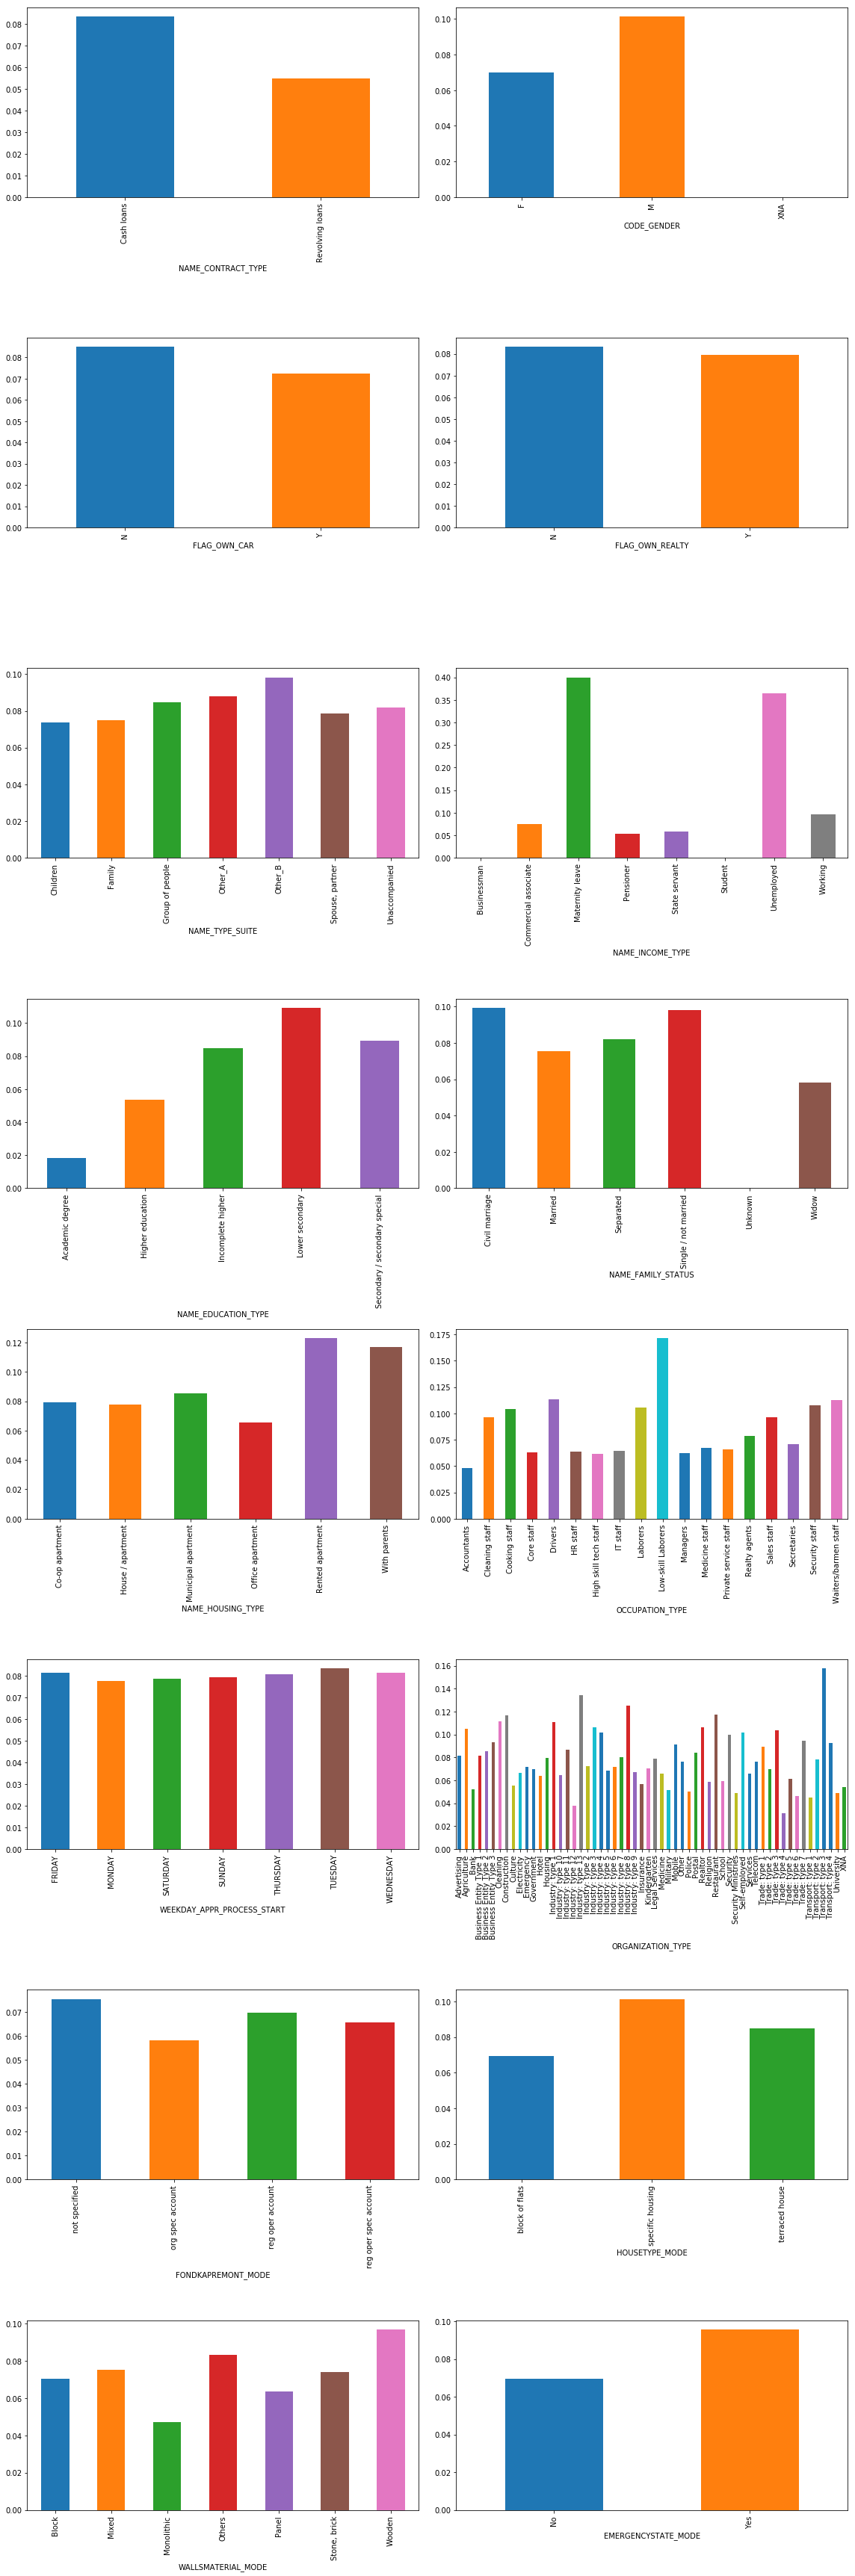

In [6]:
cate_cols = [col for col in app.columns if app[col].dtype=='object']

def draw_target_mean(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(16, 48))
    for col in cols:
        plt.subplot(n_row, 2, i)
        app.groupby(col)['TARGET'].mean().plot(kind='bar')
        i += 1
    plt.tight_layout()
    plt.show()

draw_target_mean(cate_cols)

<font size=5>Visualisation on AMT cols</font>

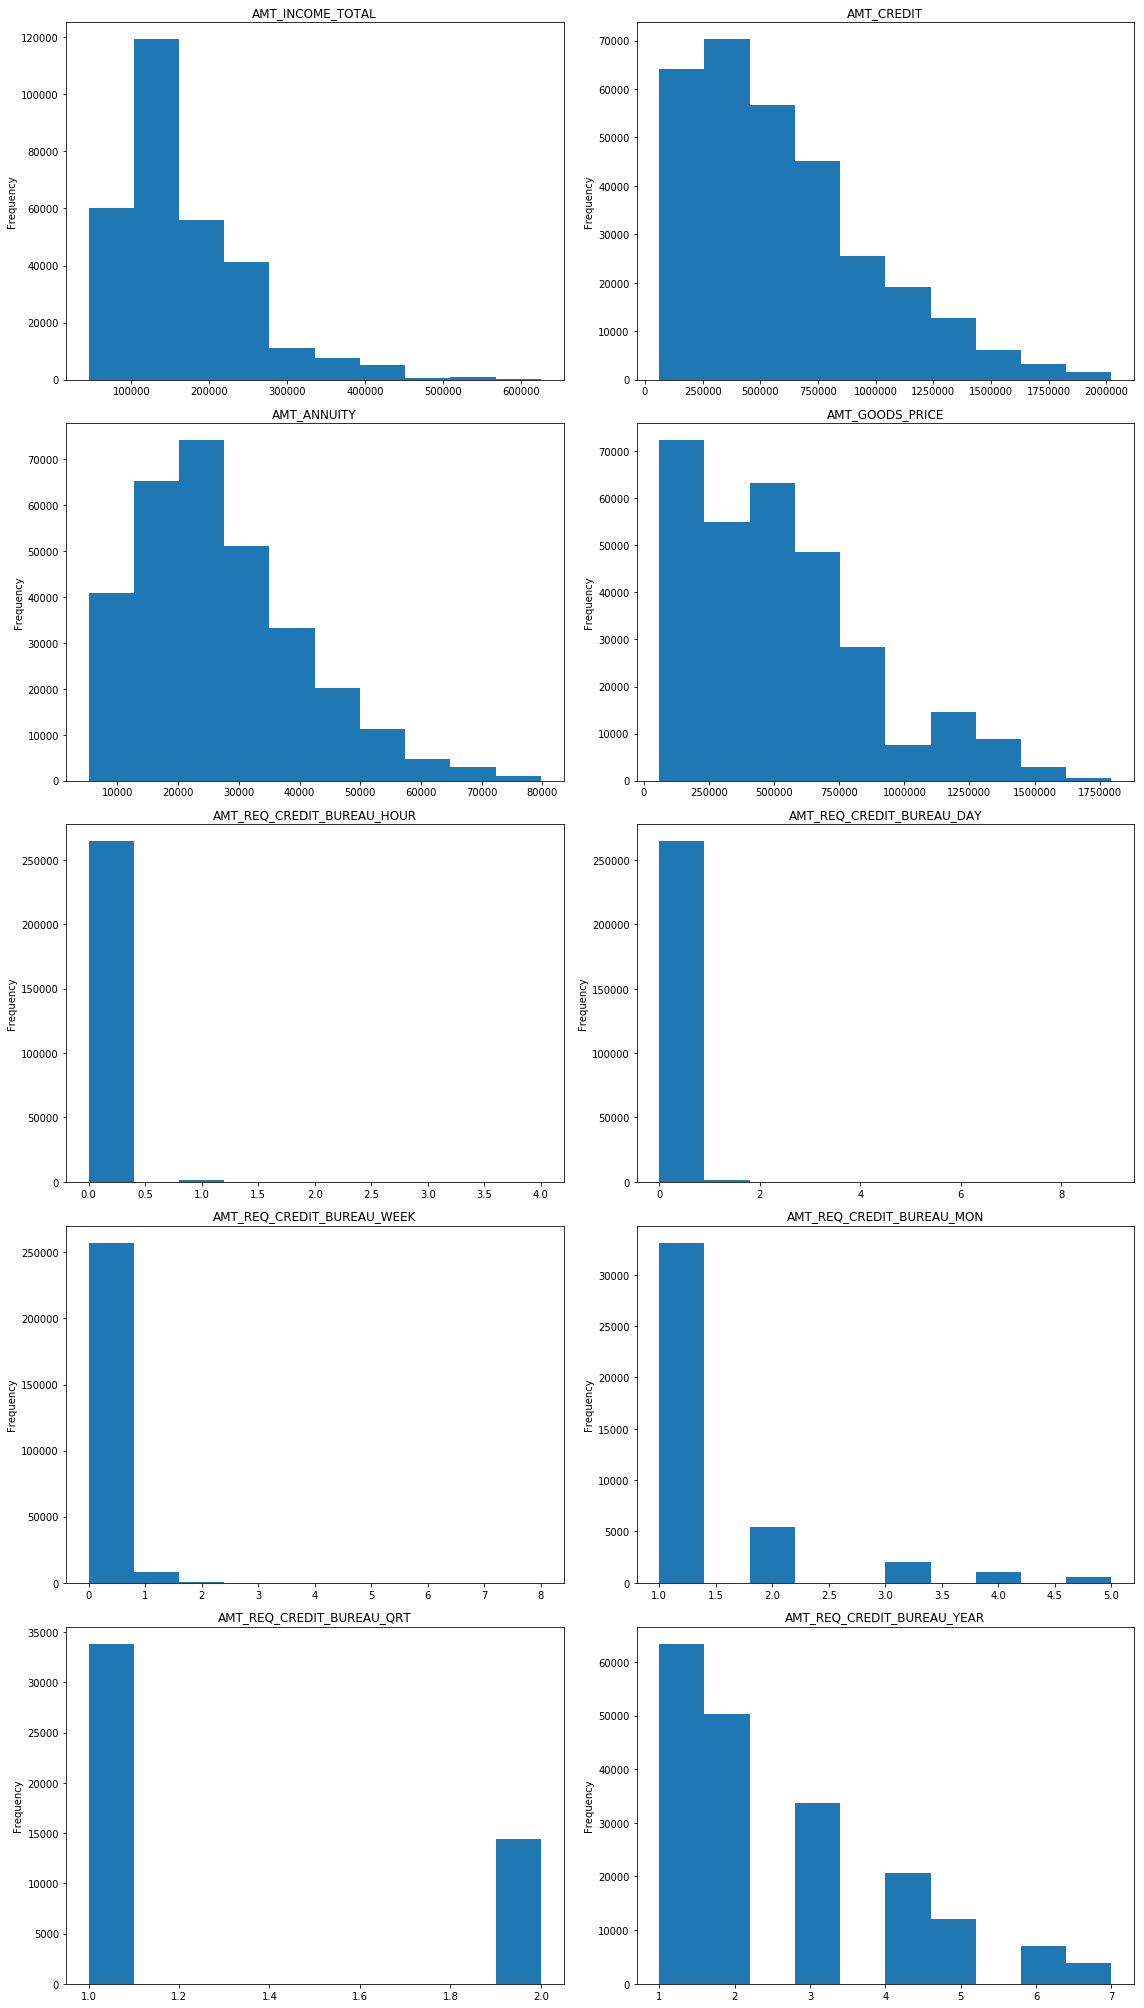

In [7]:
def draw_amt_dist(amt_cols):
    from math import ceil
    n_row = ceil(len(amt_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 28))
    for col in amt_cols:
        plt.subplot(n_row, 2, i)
        if app[col].nunique() > 10:
            up_bnd = app[col].quantile(.995)
            low_bnd = app[col].quantile(.005)
            app[(app[col] > low_bnd) & (app[col] < up_bnd)][col].plot(kind='hist')
        else:
            app[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

amt_cols = [col for col in app.columns if "AMT" in col]
draw_amt_dist(amt_cols)

<font size=3>Those AMT_REQ cols might refelect how eagerly a client is asking for a loan</font>

<font size=3>and see the correlation with TARGET</font>

In [8]:
app[amt_cols].corrwith(app['TARGET'])

AMT_INCOME_TOTAL             -0.003982
AMT_CREDIT                   -0.030369
AMT_ANNUITY                  -0.012817
AMT_GOODS_PRICE              -0.039645
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
dtype: float64

<font size=5>Visualisation on DAYS cols</font>
<p><font size=3>NOTE: we change all the negative values to positive, and convert them to years</font></p>

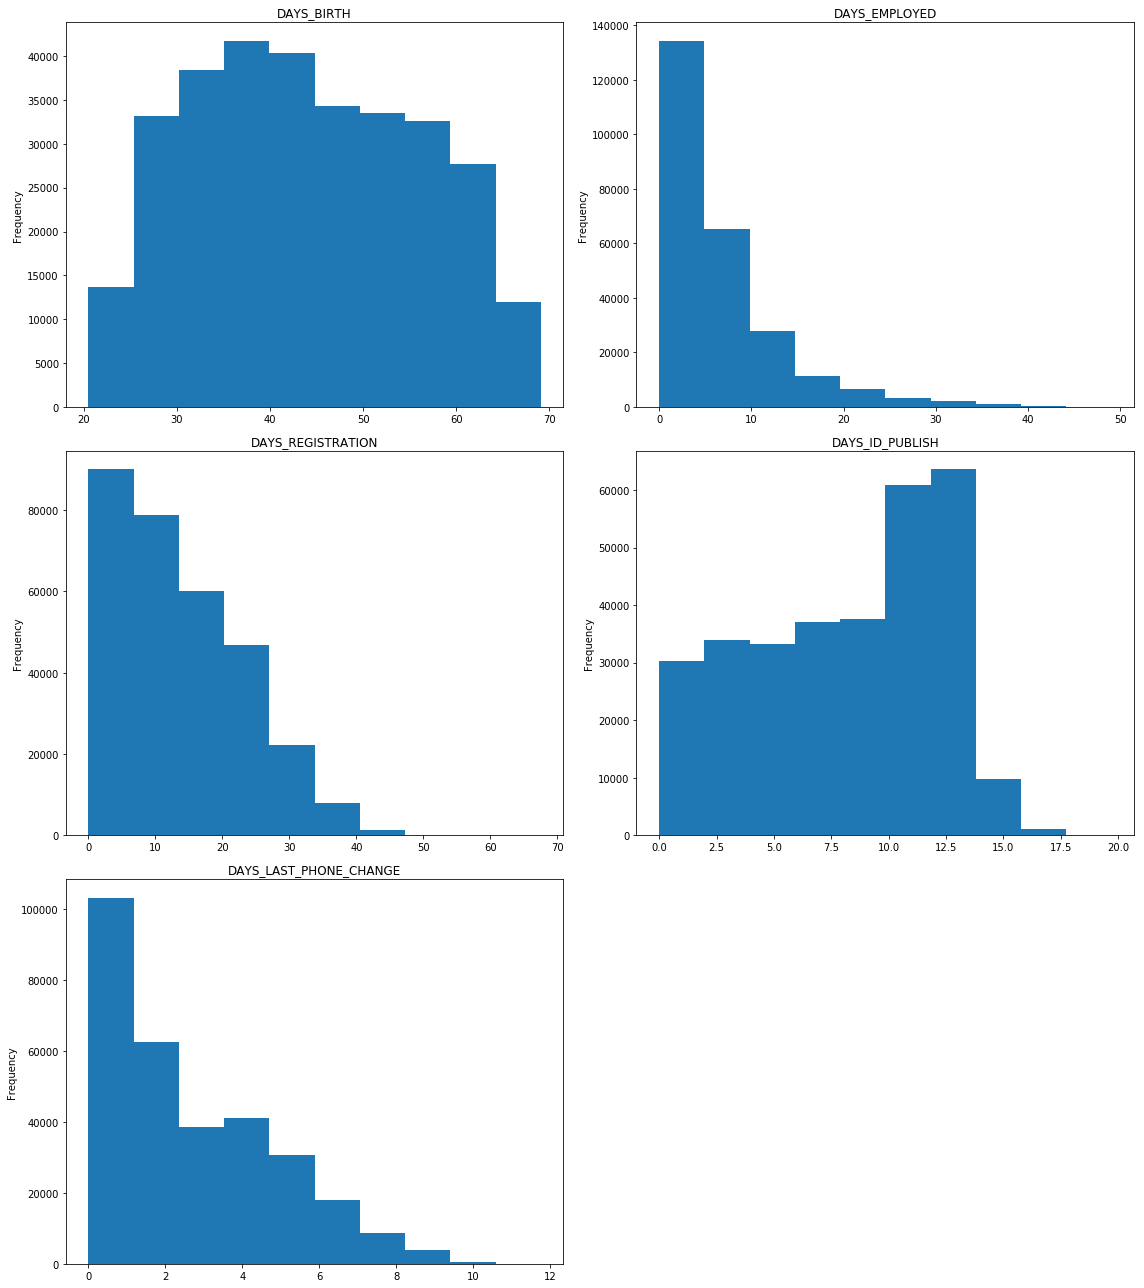

In [9]:
def draw_days_dist(days_cols):
    from math import ceil
    n_row = ceil(len(days_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 18))
    for col in days_cols:
        plt.subplot(n_row, 2, i)
        (-app[col] / 365.25).plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

days_cols = [col for col in app.columns if "DAYS" in col]
draw_days_dist(days_cols)

In [10]:
app[days_cols].corrwith(app['TARGET'])

DAYS_BIRTH                0.078239
DAYS_EMPLOYED             0.074958
DAYS_REGISTRATION         0.041975
DAYS_ID_PUBLISH           0.051457
DAYS_LAST_PHONE_CHANGE    0.055218
dtype: float64

<font size=3> DAYS_BIRTH and DAYS_EMPLOYED are really strong indicators </font>

<font size=5>Distribution on doc_cols</font>

In [11]:
def draw_flag_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(14, 12))
    for col in cols:
        plt.subplot(n_row, 2, i)
        app[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

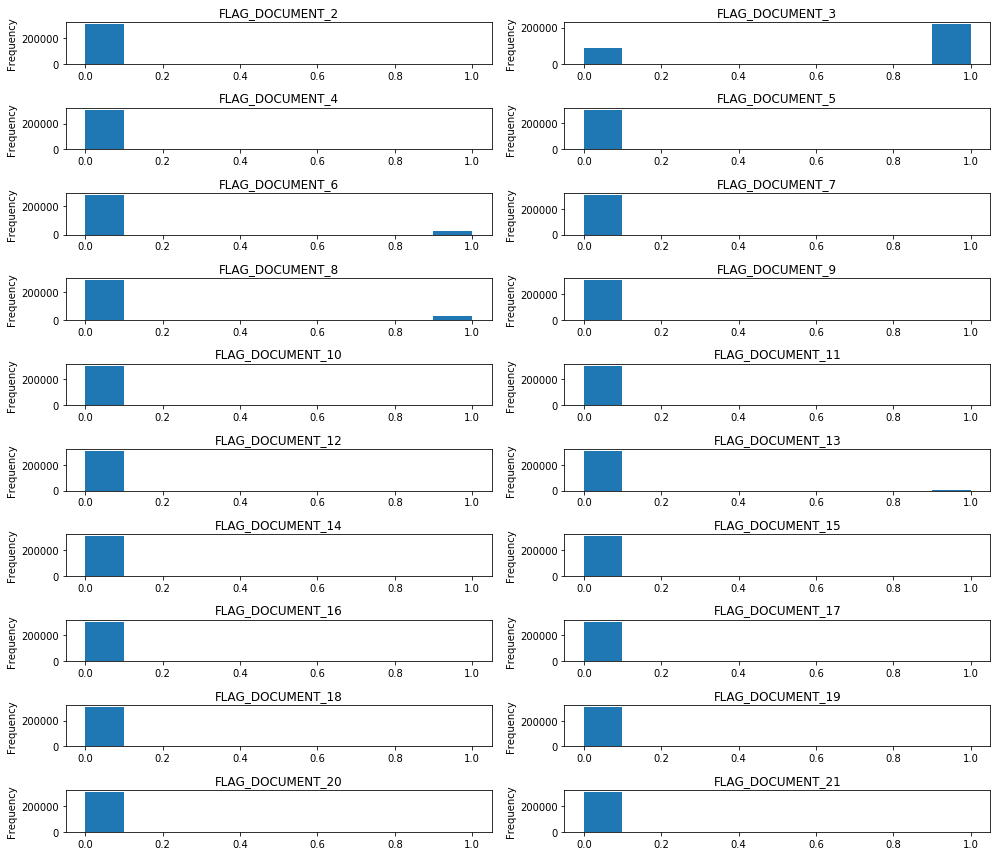

In [12]:
doc_cols = [col for col in app.columns if '_DOCUMENT_' in col]
draw_flag_dist(doc_cols)

<font size=5>Distribution on contact_cols</font>

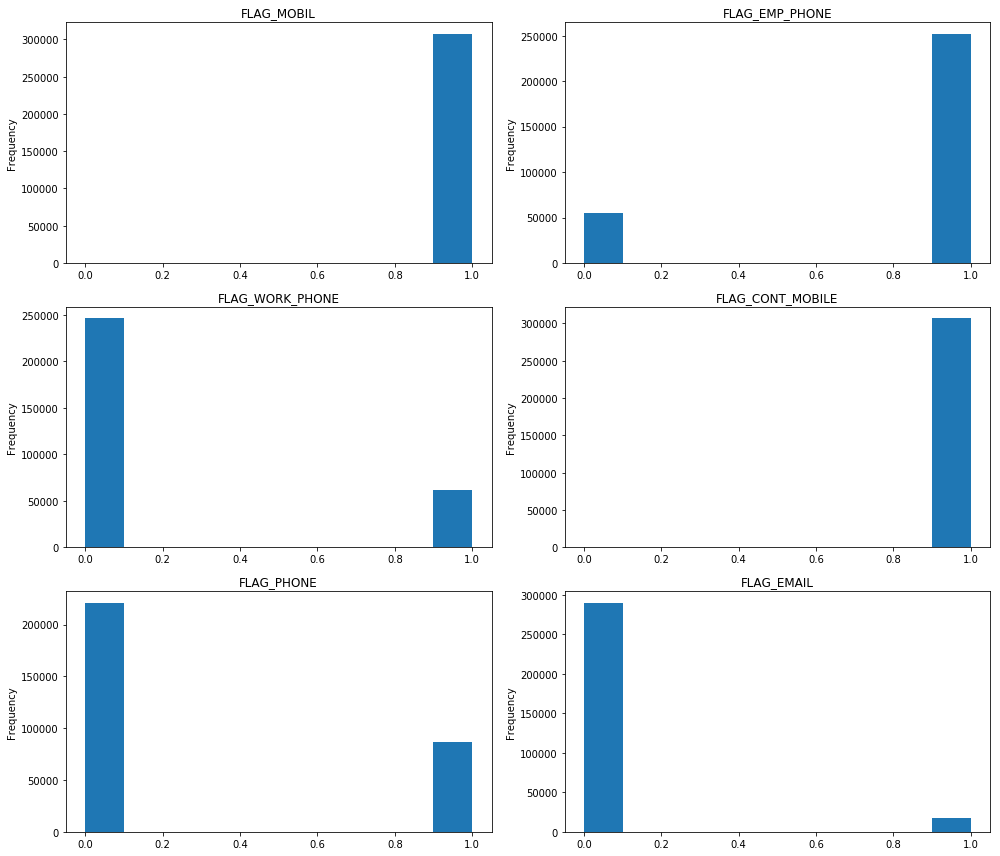

In [13]:
contact_cols = [
    'FLAG_MOBIL', 
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE', 
    'FLAG_EMAIL'
]
draw_flag_dist(contact_cols)

<font size=5>Distribution on loc_info_cols</font>

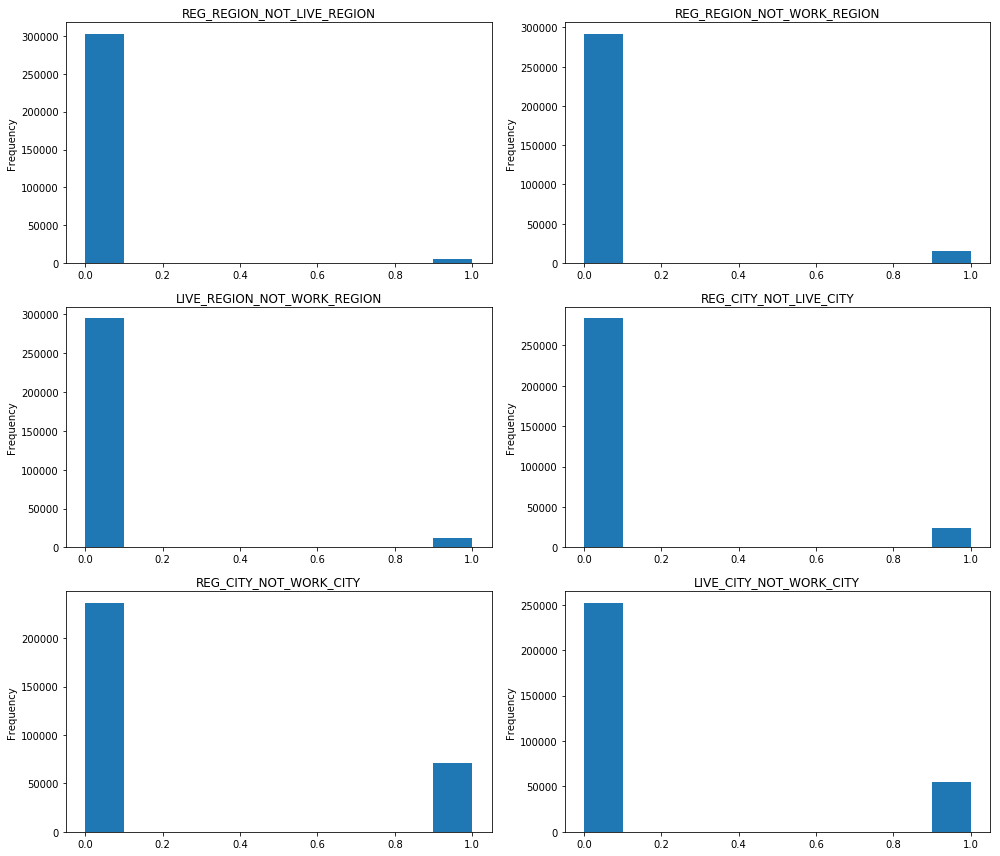

In [14]:
loc_info_cols = [
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY'
]
draw_flag_dist(loc_info_cols)

<font size=5> social circle

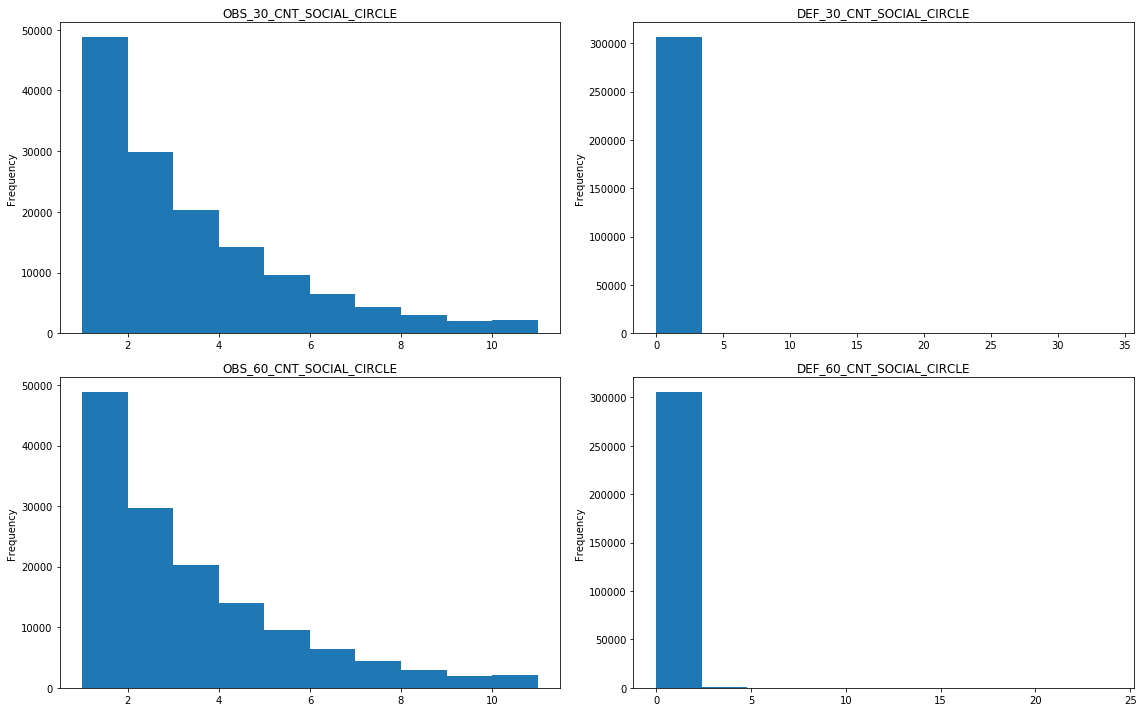

In [15]:
social_cols = [col for col in app.columns if 'SOCIAL' in col]

def draw_social_dist(social_cols):
    from math import ceil
    n_row = ceil(len(social_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 10))
    for col in social_cols:
        plt.subplot(n_row, 2, i)
        if app[col].nunique() > 10:
            up_bnd = app[col].quantile(.995)
            low_bnd = app[col].quantile(.005)
            app[(app[col] > low_bnd) & (app[col] < up_bnd)][col].plot(kind='hist')
        else:
            app[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

draw_social_dist(social_cols)

<font size=5> Correlaiton between numeric features

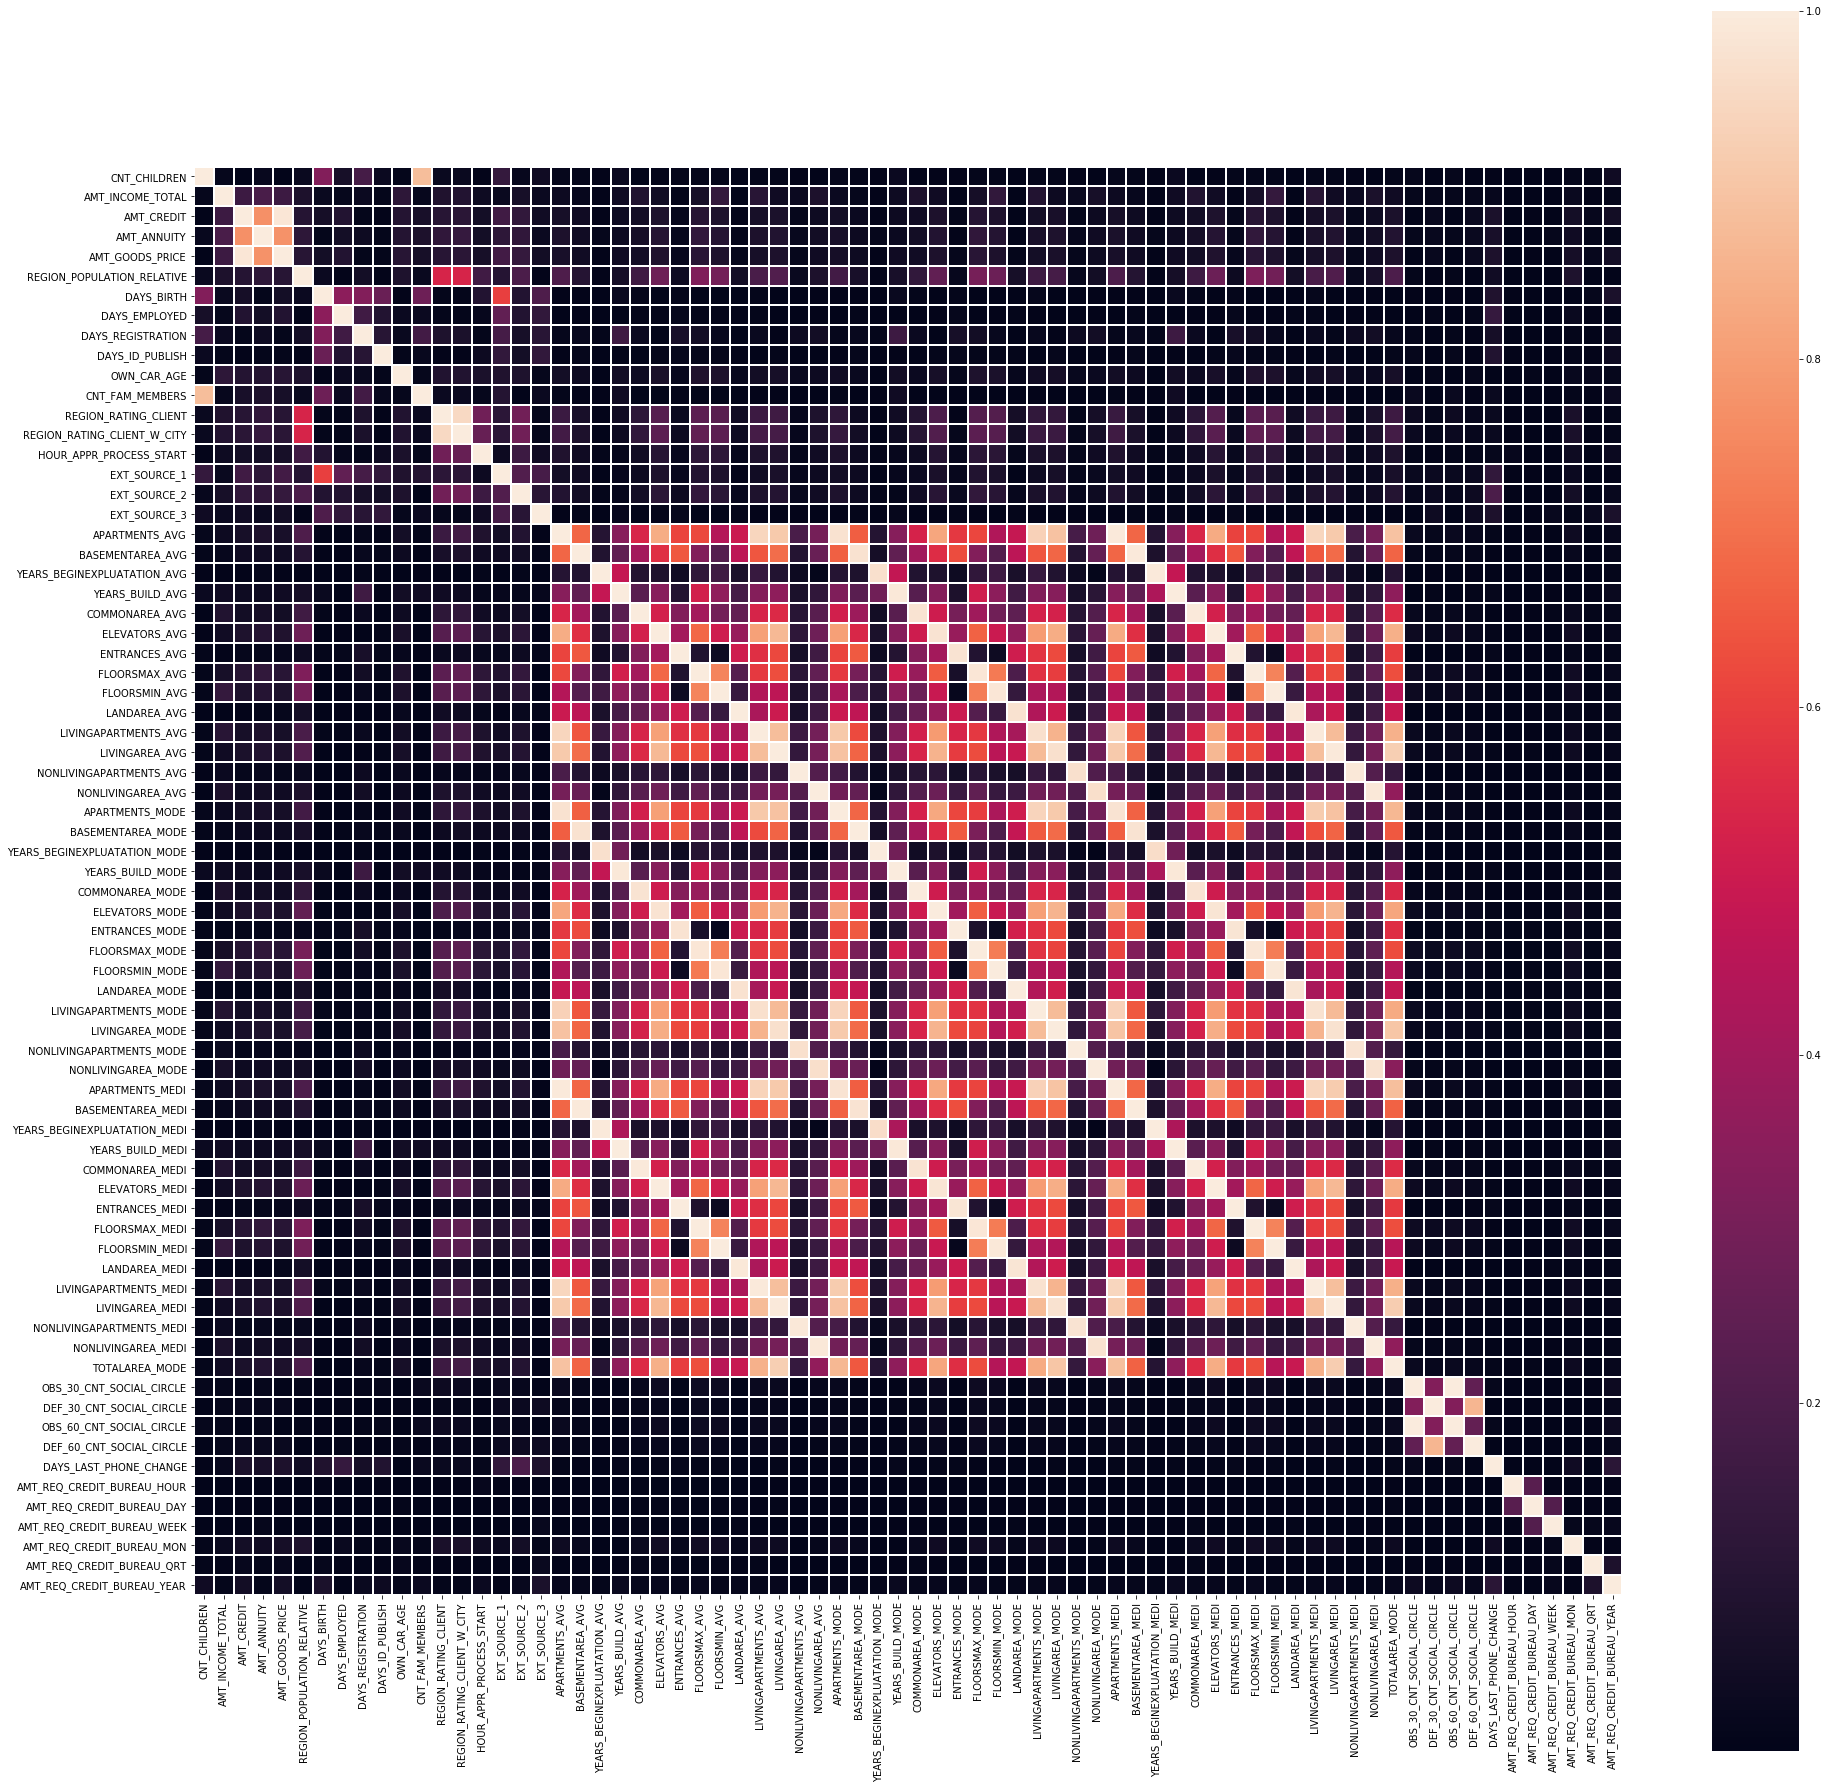

In [16]:
# discuss all the numeric cols' relationship except contact_cols, doc_cols and loc_info_cols merey with 2 values
skip_cols = ['SK_ID_CURR', 'TARGET'] + cate_cols + doc_cols + contact_cols + loc_info_cols
numeric_cols = [col for col in app.columns if col not in skip_cols]
plt.figure(figsize=(32, 32))
sns.heatmap(abs(app[numeric_cols].corr()), linewidths=1, square=True)

<font size=3> All housing cols are highly correlated. Mabe we shall look those features separately from other numeric features. And during modelling stage, these featurs also need a good care. </font>

In [19]:
housing_info_cols = [col for col in app.columns if app[col].dtype != 'object' and ('_AVG' in col or '_MODE' in col or '_MEDI' in col)]

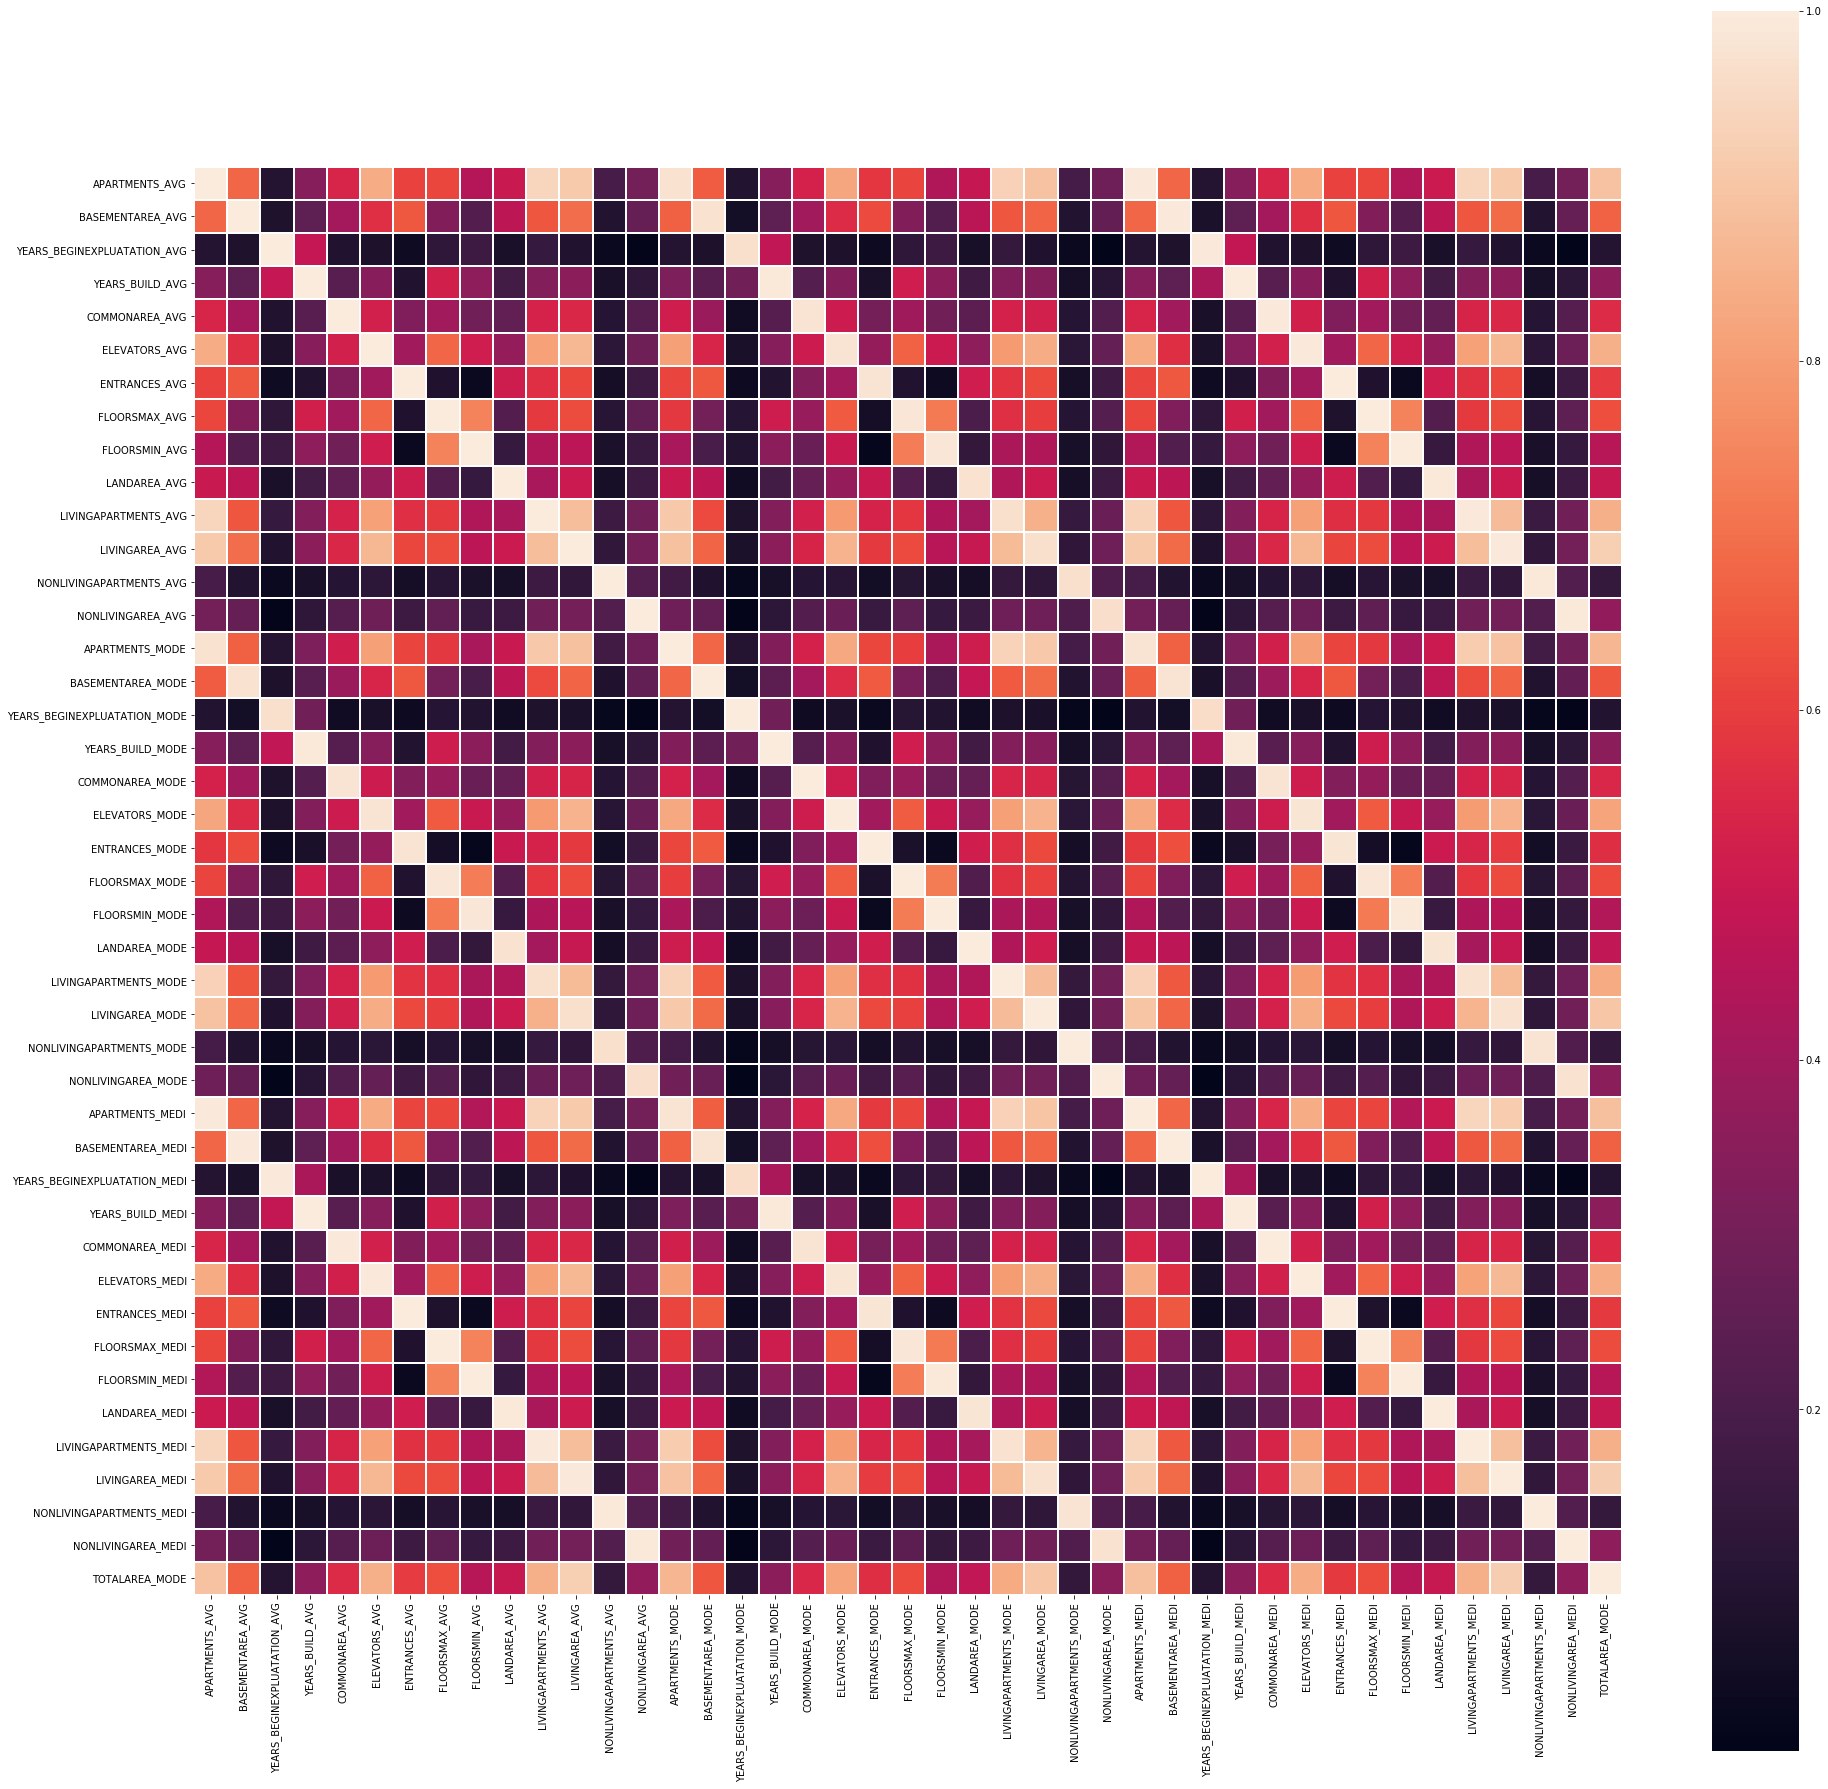

In [20]:
plt.figure(figsize=(32, 32))
sns.heatmap(abs(app[housing_info_cols].corr()), linewidths=1, square=True)

<font size=3> Now see the Heatmap without housing_info_cols

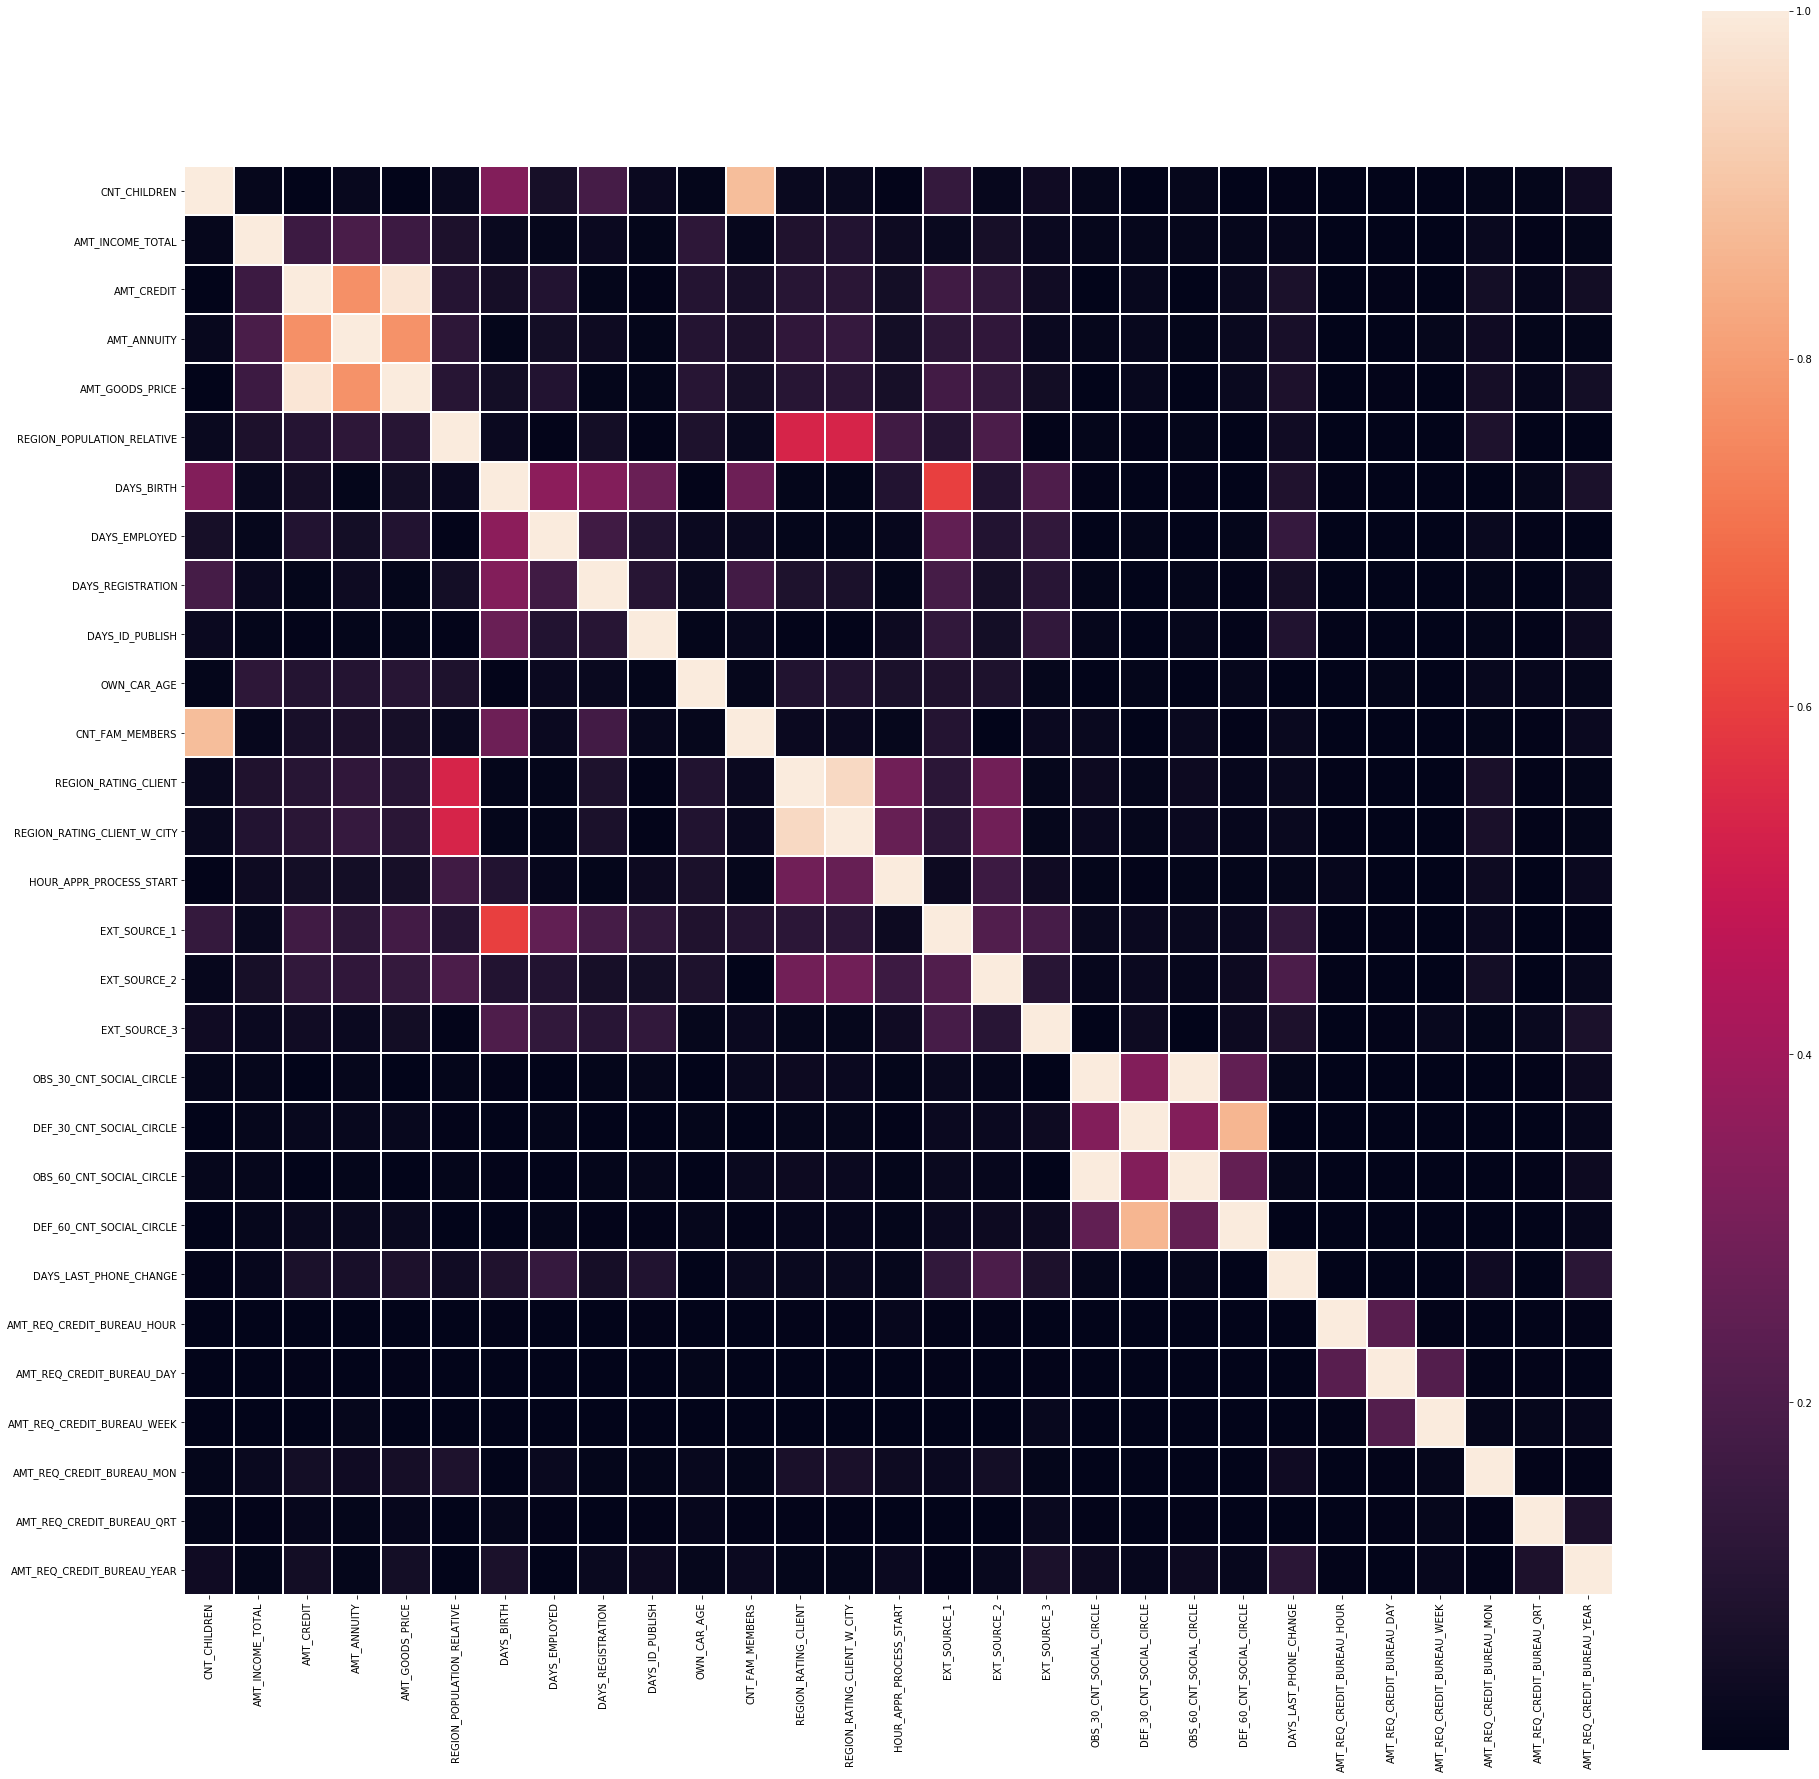

In [21]:
skip_cols = ['SK_ID_CURR', 'TARGET'] + cate_cols + doc_cols + contact_cols + loc_info_cols + housing_info_cols
numeric_cols_without_housing_info = [col for col in app.columns if col not in skip_cols]
plt.figure(figsize=(32, 32))
sns.heatmap(abs(app[numeric_cols_without_housing_info].corr()), linewidths=1, square=True)

<font size=5> See the situation in other col groups

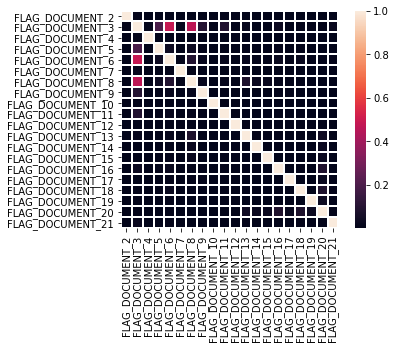

In [22]:
sns.heatmap(abs(app[doc_cols].corr()), linewidths=1, square=True)

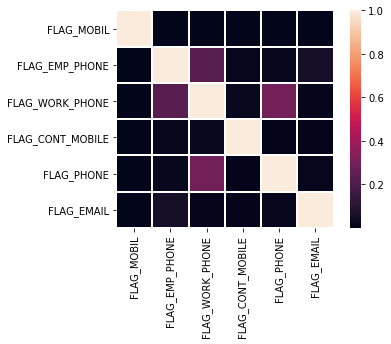

In [23]:
sns.heatmap(abs(app[contact_cols].corr()), linewidths=1, square=True)

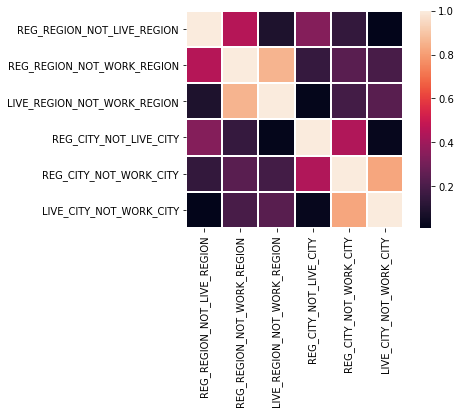

In [24]:
sns.heatmap(abs(app[loc_info_cols].corr()), linewidths=1, square=True)

<font size=5> All feature correlation with TARGET variable.

In [25]:
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    app[bin_feature], _ = pd.factorize(app[bin_feature])
cate_cols = list(set(cate_cols) - set(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']))
app_with_dummies = pd.get_dummies(app, columns=cate_cols, dummy_na=True)
abs(app_with_dummies.corrwith(app['TARGET'])).sort_values(ascending=False)[:60]

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER                                          0.054718
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZA

<font size=5> MANUAL FEATURE ENGERRING

In [26]:
# AMT RATIO
app['APP_CREDIT_TO_INCOME_RATIO'] = app['AMT_CREDIT'] / app['AMT_INCOME_TOTAL']
app['APP_CREDIT_TO_ANNUITY_RATIO'] = app['AMT_CREDIT'] / app['AMT_ANNUITY']
app['APP_CREDIT_TO_GOODS_RATIO'] = app['AMT_CREDIT'] / app['AMT_GOODS_PRICE']
app['APP_ANNUITY_TO_INCOME_RATIO'] = app['AMT_ANNUITY'] / app['AMT_INCOME_TOTAL']
app['APP_ANNUITY_TO_GOODS_RATIO'] = app['AMT_ANNUITY'] / app['AMT_GOODS_PRICE']
app['APP_GOODS_TO_INCOME_RATIO'] = app['AMT_GOODS_PRICE'] / app['AMT_INCOME_TOTAL']

# TIME RATIO
app['APP_CAR_TO_BIRTH_RATIO'] = app['OWN_CAR_AGE'] / (app['DAYS_BIRTH'] / 365.25)
app['APP_CAR_TO_EMPLOY_RATIO'] = app['OWN_CAR_AGE'] / (app['DAYS_EMPLOYED'] / 365.35)

app['APP_PHONE_TO_BIRTH_RATIO'] = app['DAYS_LAST_PHONE_CHANGE'] / app['DAYS_BIRTH']
app['APP_PHONE_TO_REG_RATIO'] = app['DAYS_LAST_PHONE_CHANGE'] / app['DAYS_REGISTRATION']
app['APP_PHONE_TO_EMPLOY_RATIO_'] = app['DAYS_LAST_PHONE_CHANGE'] / app['DAYS_EMPLOYED']
app['APP_EMPLOY_TO_BIRTH_RATIO'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']
app['APP_EMPLOY_TO_REG_RATIO'] = app['DAYS_EMPLOYED'] / app['DAYS_REGISTRATION']
app['APP_ID_PUB_TO_BIRTH_RATIO'] = app['DAYS_ID_PUBLISH'] / app['DAYS_BIRTH']
app['APP_REG_TO_BIRTH_RATIO'] = app['DAYS_REGISTRATION'] / app['DAYS_BIRTH']
app['APP_ID_PUB_TO_RE_RATIO'] = app['DAYS_ID_PUBLISH'] / app['DAYS_REGISTRATION']

app['APP_INCOME_PER_CHLD'] = app['AMT_INCOME_TOTAL'] / (1 + app['CNT_CHILDREN'])
app['APP_INCOME_PER_ADULT'] = app['AMT_INCOME_TOTAL'] / (app['CNT_FAM_MEMBERS'] - app['CNT_CHILDREN'])

In [27]:
# EXT_SCORES
for function_name in ['mean', 'std']:
    app['APP_EXT_SOURCES_{}'.format(function_name.upper())] = eval('np.{}'.format(function_name))(
        app[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

app['APP_SCORE1_TO_BIRTH_RATIO'] = app['EXT_SOURCE_1'] / (app['DAYS_BIRTH'] / 365.25)
app['APP_SCORE1_TO_EMPLOY_RATIO'] = app['EXT_SOURCE_1'] / (app['DAYS_EMPLOYED'] / 365.25)
app['APP_SCORE3_TO_BIRTH_RATIO'] = app['EXT_SOURCE_3'] / (app['DAYS_BIRTH'] / 365.25)
app['APP_SCORE1_TO_SCORE2_RATIO'] = app['EXT_SOURCE_1'] / app['EXT_SOURCE_2'] 
app['APP_SCORE1_TO_SCORE3_RATIO'] = app['EXT_SOURCE_1'] / app['EXT_SOURCE_3']
app['APP_SCORE2_TO_REGION_RATING_RATIO'] = app['EXT_SOURCE_2'] / app['REGION_RATING_CLIENT']
app['APP_SCORE2_TO_CITY_RATING_RATIO'] = app['EXT_SOURCE_2'] / app['REGION_RATING_CLIENT_W_CITY']
app['APP_SCORE2_TO_POP_RATIO'] = app['EXT_SOURCE_2'] / app['REGION_POPULATION_RELATIVE']

In [28]:
# DOCUMENT
app['APP_ALL_DOC_CNT'] = app[doc_cols].sum(axis=1)
app['APP_DOC3_6_8_CNT'] = app['FLAG_DOCUMENT_3'] + app['FLAG_DOCUMENT_6'] + app['FLAG_DOCUMENT_8']
app['APP_DOC3_6_8_CNT_RAIO'] = app['APP_DOC3_6_8_CNT'] / app['APP_ALL_DOC_CNT']

In [29]:
# HOUSING FEATURES
housing_info_cols.sort()
i, j = 0, 1
while i < len(housing_info_cols) and j < len(housing_info_cols):
    col = housing_info_cols[i]
    k = col.rfind('_')
    col_ = housing_info_cols[j]
    while j < (len(housing_info_cols) - 1) and col[0:k] == col_[0:k]:
        j += 1
        col_ = housing_info_cols[j]
    new_col_name = 'APP_{}_NEW_HOUSING_SCORE'.format(col[0:k])
    app[new_col_name] = app[housing_info_cols[i: j]].mean(axis=1)
    i = j
    j = i + 1

app.drop(columns=housing_info_cols, inplace=True)

In [30]:
# OTHER
app['APP_CAR_PLUS_REALTY'] = app['FLAG_OWN_REALTY'] + app['FLAG_OWN_CAR']
app['APP_CHILD_RATIO'] = app['CNT_CHILDREN'] / app['CNT_FAM_MEMBERS']

app['APP_REGION_RATING_TO_POP_RATIO'] = app['REGION_RATING_CLIENT'] / app['REGION_POPULATION_RELATIVE']
app['APP_CITY_RATING_TO_POP_RATIO'] = app['REGION_RATING_CLIENT_W_CITY'] / app['REGION_POPULATION_RELATIVE']

app['APP_REGION_ALL_NOT_EQ'] = app['REG_REGION_NOT_LIVE_REGION'] + app['REG_REGION_NOT_WORK_REGION'] + app['LIVE_REGION_NOT_WORK_REGION']
app['APP_CITY_ALL_NOT_EQ'] = app['REG_CITY_NOT_LIVE_CITY'] + app['REG_CITY_NOT_WORK_CITY'] + app['LIVE_CITY_NOT_WORK_CITY']

app['APP_CONTACT_ALL_CNT'] = app[contact_cols].sum(axis=1)

app['APP_DEF_TO_OBS_RATIO_30'] = app['DEF_30_CNT_SOCIAL_CIRCLE'] / app['OBS_30_CNT_SOCIAL_CIRCLE']
app['APP_DEF_TO_OBS_RATIO_60'] = app['DEF_60_CNT_SOCIAL_CIRCLE'] / app['OBS_60_CNT_SOCIAL_CIRCLE']


# REQ AMT
app['APP_REQ_WEEK_GT_MON'] = app['AMT_REQ_CREDIT_BUREAU_WEEK'] > app['AMT_REQ_CREDIT_BUREAU_YEAR']
app['APP_REQ_MON_GT_QRT'] = app['AMT_REQ_CREDIT_BUREAU_MON'] > app['AMT_REQ_CREDIT_BUREAU_YEAR']
app['APP_REQ_QRT_GT_YEAR'] = app['AMT_REQ_CREDIT_BUREAU_QRT'] > app['AMT_REQ_CREDIT_BUREAU_YEAR']
app['APP_REQ_CNT_TOTAL'] = app['APP_REQ_WEEK_GT_MON'] + app['APP_REQ_MON_GT_QRT'] + app['APP_REQ_QRT_GT_YEAR']

app['APP_CUM_REQ_DAY'] = app['AMT_REQ_CREDIT_BUREAU_HOUR'] + app['AMT_REQ_CREDIT_BUREAU_DAY']
app['APP_CUM_REQ_WEEK'] = app['APP_CUM_REQ_DAY'] + app['AMT_REQ_CREDIT_BUREAU_WEEK']
app['APP_CUM_REQ_MON'] = app['APP_CUM_REQ_WEEK'] + app['AMT_REQ_CREDIT_BUREAU_MON']
app['APP_CUM_REQ_QRT'] = app['APP_CUM_REQ_MON'] + app['AMT_REQ_CREDIT_BUREAU_QRT']
app['APP_CUM_REQ_YEAR'] = app['APP_CUM_REQ_QRT'] + app['AMT_REQ_CREDIT_BUREAU_YEAR']

app['APP_CUM_REQ_WEEK_TO_QRT_RATIO'] = app['APP_CUM_REQ_WEEK'] / app['APP_CUM_REQ_QRT']
app['APP_CUM_REQ_WEEK_TO_YEAR_RATIO'] = app['APP_CUM_REQ_WEEK'] / app['APP_CUM_REQ_YEAR']
app['APP_CUM_REQ_MON_TO_QRT_RATIO'] = app['APP_CUM_REQ_MON'] / app['APP_CUM_REQ_QRT']
app['APP_CUM_REQ_MON_TO_YEAR_RATIO'] = app['APP_CUM_REQ_MON'] / app['APP_CUM_REQ_YEAR']

/Users/j.zhou/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [31]:
def one_hot_encoding(df, nan_as_category):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

app, _ = one_hot_encoding(app, True)

In [32]:
new_gen_cols = [col for col in app.columns if 'APP_' in col]
abs(app[new_gen_cols].corrwith(app['TARGET'])).sort_values(ascending=False)[:60]

APP_EXT_SOURCES_MEAN                             0.222052
APP_SCORE1_TO_BIRTH_RATIO                        0.142094
APP_SCORE2_TO_CITY_RATING_RATIO                  0.126721
APP_SCORE2_TO_REGION_RATING_RATIO                0.125950
APP_SCORE3_TO_BIRTH_RATIO                        0.115915
APP_CREDIT_TO_GOODS_RATIO                        0.069427
APP_EMPLOY_TO_BIRTH_RATIO                        0.067955
APP_CITY_ALL_NOT_EQ                              0.052313
APP_CAR_TO_BIRTH_RATIO                           0.048824
APP_FLOORSMAX_NEW_HOUSING_SCORE                  0.043808
APP_SCORE2_TO_POP_RATIO                          0.042760
APP_DEF_TO_OBS_RATIO_30                          0.042182
APP_DEF_TO_OBS_RATIO_60                          0.038665
APP_PHONE_TO_BIRTH_RATIO                         0.033991
APP_ELEVATORS_NEW_HOUSING_SCORE                  0.033562
APP_FLOORSMIN_NEW_HOUSING_SCORE                  0.033341
APP_TOTALAREA_NEW_HOUSING_SCORE                  0.032596
APP_LIVINGAREA